In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vega_datasets import data

In [3]:
data?

# Temperature in San Francisco
"This dataset contains hourly temperatures in San Francisco during the full year of 2010. The dataset is drawn from public-domain `NOAA data <https://www.weather.gov/disclaimer>`, and transformed using scripts available at http://github.com/vega/vega_datasets/."

In [6]:
df_sf_temps = data.sf_temps()

In [8]:
print(df_sf_temps.shape)
df_sf_temps.head()

(8759, 2)


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [9]:
df_sf_temps.date = pd.to_datetime(df_sf_temps.date)
df_sf_temps = df_sf_temps.set_index('date').sort_index()

## 1.
Resample by the day and take the average temperature. Visualize the average temperature over time.

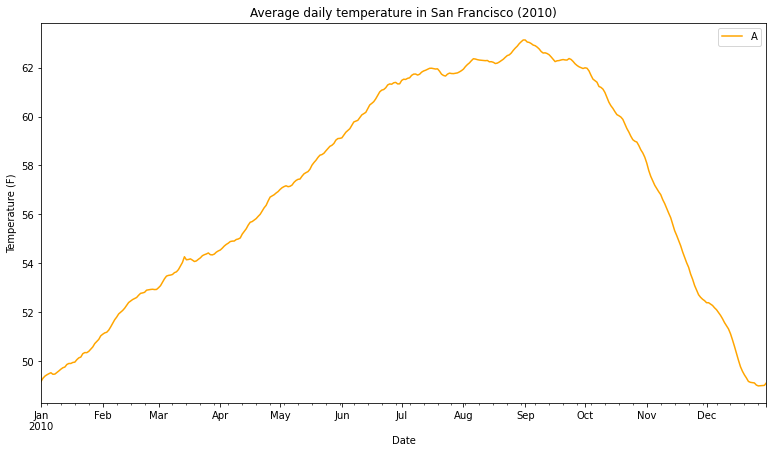

In [219]:
daily_avg_temp = df_sf_temps.resample('D').mean()


daily_avg_temp.plot(figsize=(13, 7),
                    title="Average daily temperature in San Francisco (2010)",
                    color='orange'
                   )
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(('Average'));

## 2.
Write the code necessary to visualize the minimum temperature over time.

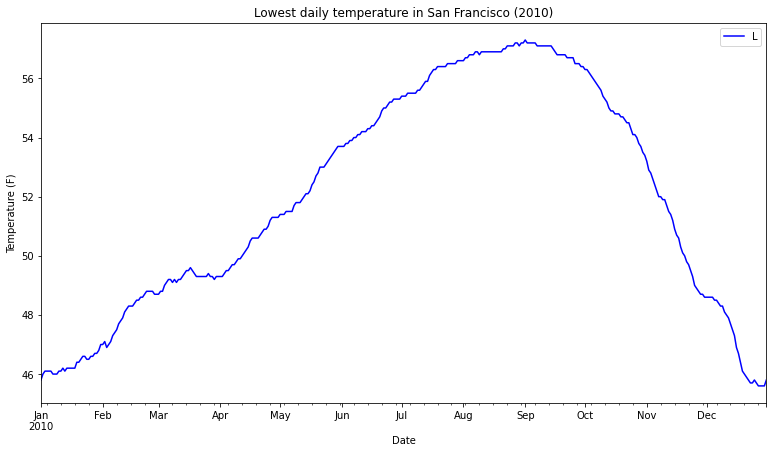

In [216]:
daily_minimum_temp = df_sf_temps.resample('D').min()

daily_minimum_temp.plot(figsize=(13, 7),
                        title="Lowest daily temperature in San Francisco (2010)",
                        color='blue'
                       )

plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(('Low'));

## 3. 
Write the code necessary to visualize the maximum temperature over time.

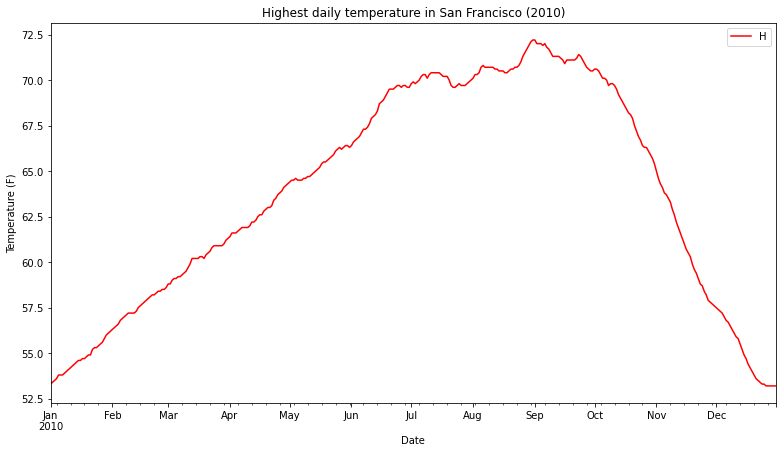

In [213]:
daily_maximum_temp = df_sf_temps.resample('D').max()

daily_maximum_temp.plot(figsize=(13, 7),
                        title='Highest daily temperature in San Francisco (2010)',
                        color='red',
                        label='High'
                       )
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(('High'));

## 4.
Which month is the coldest, on average?

In [135]:
monthly_temps = df_sf_temps.resample('M').mean()

In [136]:
monthly_temps

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [137]:
coldest_month = monthly_temps.idxmin()[0]
coldest_month = coldest_month.strftime('%B')

print(f"{coldest_month} was the coldest month on average in 2010.")

January was the coldest month on average in 2010.


## 5.
Which month has the highest average temperature?

In [138]:
hottest_month = monthly_temps.idxmax()[0]
hottest_month = hottest_month.strftime('%B')

print(f"{hottest_month} was the hottest month on average in 2010.")

September was the hottest month on average in 2010.


## 6.
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. 

In [269]:
high_low_temps = df_sf_temps.resample('D')['temp'].agg(['max', 'min'])

In [270]:
high_low_temps = high_low_temps.assign(
    
    variability = high_low_temps['max'] \
                     - high_low_temps['min']
)

In [271]:
high_low_temps.head()

,max,min,variability
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4
2010-01-03,53.5,46.1,7.4
2010-01-04,53.6,46.1,7.5
2010-01-05,53.8,46.1,7.7


Which month has the highest daily temperature variability?

In [274]:
monthly_variable_max_temps = high_low_temps.resample('M')['variability'].agg(['mean'])

In [275]:
monthly_variable_max_temps

,mean
date,
2010-01-31,8.341935
2010-02-28,9.485714
2010-03-31,10.854839
2010-04-30,12.320000
2010-05-31,12.909677
2010-06-30,13.950000
2010-07-31,13.977419
2010-08-31,13.870968
2010-09-30,14.403333


In [276]:
monthly_most_variable = monthly_variable_max_temps.idxmax()[0].strftime('%B')

In [277]:
print(f"{monthly_most_variable} had the highest daily temperature variability in 2010.")

September had the highest daily temperature variability in 2010.


## 7. Bonus
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [150]:
df_HLA_temps = pd.concat([daily_maximum_temp.rename(columns={'temp': 'daily_high'}),
                          daily_avg_temp.rename(columns={'temp': 'daily_average'}),
                          daily_minimum_temp.rename(columns={'temp': 'daily_low'})],
                         axis=1
                        )

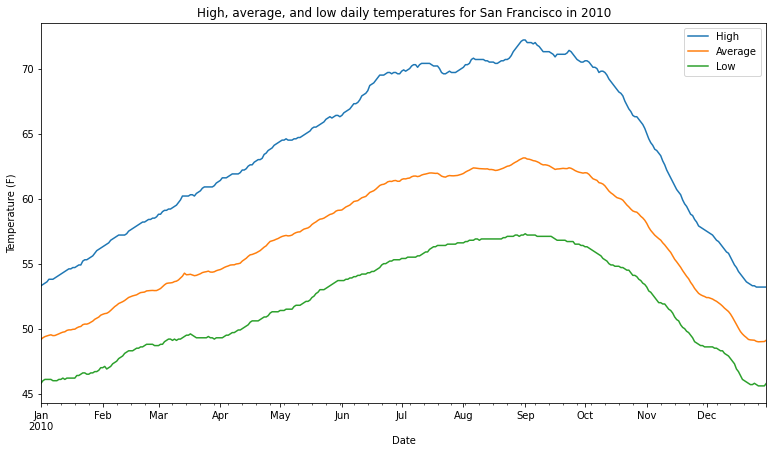

In [214]:
df_HLA_temps.plot(figsize=(13, 7),
                  animated=True,
                  title='High, average, and low daily temperatures for San Francisco in 2010'
                 )

plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(('High', 'Average', 'Low'));

# Seattle Weather

In [229]:
df_seattle = data.seattle_weather()

In [230]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [232]:
df_seattle = df_seattle.set_index('date').sort_index()

## 1. 
Which year and month combination has the highest amount of precipitation?

In [260]:
monthly_total_precipitation = df_seattle.resample('M')['precipitation'].agg(['sum'])
date_of_most_percipitation = monthly_total_precipitation.idxmax()[0].strftime('%B %Y')
highest_amount_of_percipitation = monthly_total_precipitation.max()[0]

In [280]:
print(f'The month and year with the highest recorded percipitation: {date_of_most_percipitation}')
print(f'Amount of percipitation: {highest_amount_of_percipitation:.2f}')

The month and year with the highest recorded percipitation: December 2015
Amount of percipitation: 284.50


## 2.
Visualize the amount of monthly precipitation over time.

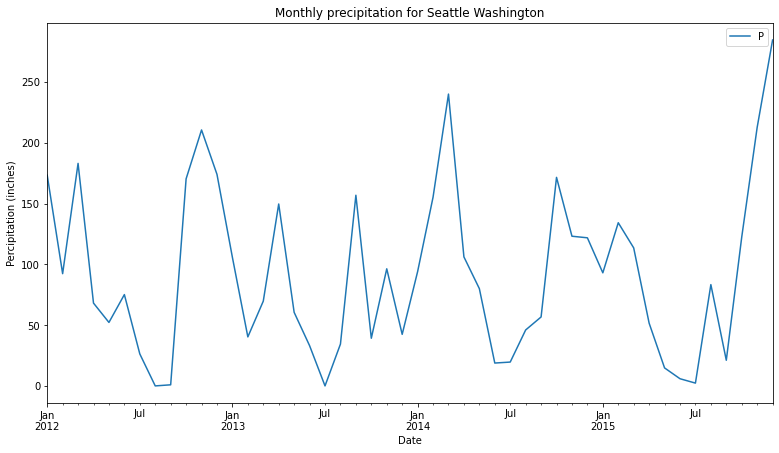

In [282]:
monthly_total_precipitation.plot(figsize=(13, 7),
                                 title='Monthly precipitation in Seattle Washington')

plt.xlabel('Date')
plt.ylabel('Percipitation (inches)')
plt.legend(('Percipitation'));

## 3.
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Bi-weekly average wind speed in Seattle Washington'}, xlabel='date'>

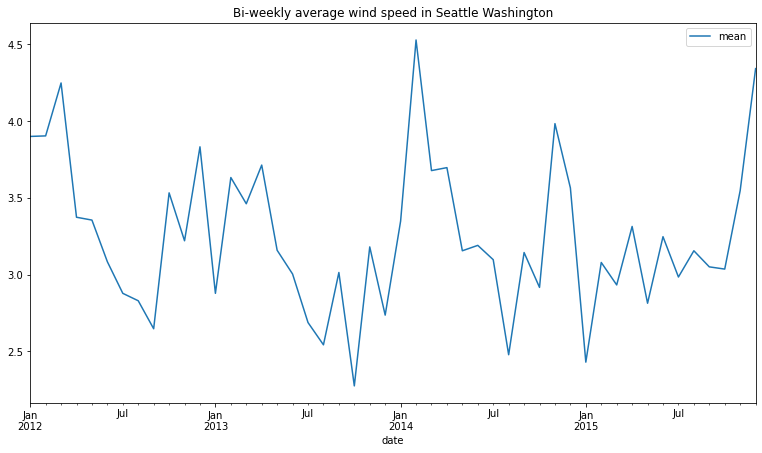

In [290]:
df_seattle.resample('M')['wind'].agg(['mean']).plot(figsize=(13, 7),
                                                     title='Bi-weekly average wind speed in Seattle Washington'
                                                   )

## 4.
Which year-month combination is the windiest?

## 5.
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

## 6.
In which month does it rain the most?

## 7.
Which month has the most number of days with a non-zero amount of precipitation?